In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import spacy
from collections import Counter
import os
current_path = os.getcwd()
print(current_path)

c:\Users\BFO3515\OneDrive - HCA Healthcare\Documents\Holly Hou\Data\Notebooks


In [27]:

# Try different encodings if the first one doesn't work
encodings = ['latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv('survey.csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")
df.columns
# Function to convert column names to kebab-case
def to_kebab_case(col_name):
    return col_name.replace(' ', '_')

# Apply the function to all column names
df.columns = [to_kebab_case(col) for col in df.columns]

Successfully read the file with encoding: latin1


In [17]:
df.head(2)

,Response_ID,Column1,Status,City,State/Region,P1,P2,P3,P4,P5,Clubs,Sports_Leagues,Social_Outings_,Other_interested_Activities,area_of_focus_in_future,Preferred_Frequency,Preferred_Hours,additional_ideas_or_requests.
0,148,NaN,Complete,NaN,FL,Professional Development,NaN,NaN,Social activities & events,NaN,2.0,5.0,1.0,Lunch and learns,Other - Write In (Required),Quarterly,Over the lunch hour,Coordinate with DEI Council to space events ou...
1,142,NaN,Complete,NaN,FL,Professional Development,Mentoring,Cross-functional networking,Social activities & events,NaN,2.0,4.0,5.0,Board/Card Game Tournaments,Engagement & culture,No preference,Afternoon during work hours,Sounds game outings


In [18]:
def plot_pie_chart(dataframe, column_name):
    """
    Plots a pie chart for the specified column in the given DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    # Count the occurrences of each unique value in the specified column
    value_counts = dataframe[column_name].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    plt.title(f'EAG Activity {column_name} Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()

    # Display the plot
    plt.show()




In [12]:
df.columns

Index(['Response_ID', 'Column1', 'Status', 'City', 'State/Region', 'P1', 'P2',
       'P3', 'P4', 'P5', 'Clubs', 'Sports_Leagues', 'Social_Outings_',
       'Other_interested_Activities', 'area_of_focus_in_future',
       'Preferred__Frequency', 'Preferred_hours',
       'additional_ideas_or_requests.'],
      dtype='object')

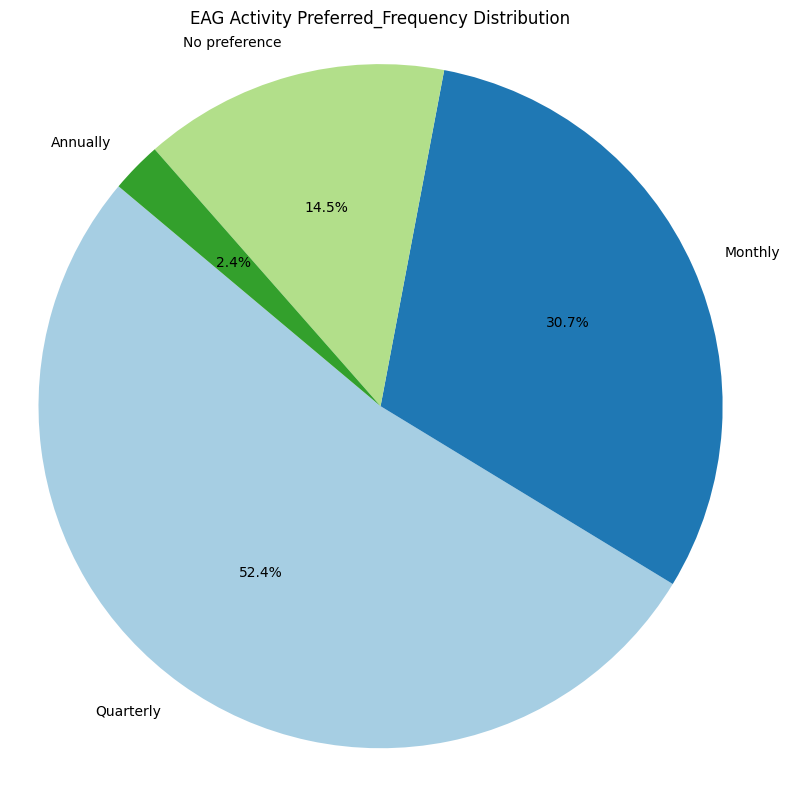

In [19]:
plot_pie_chart(df,'Preferred_Frequency')

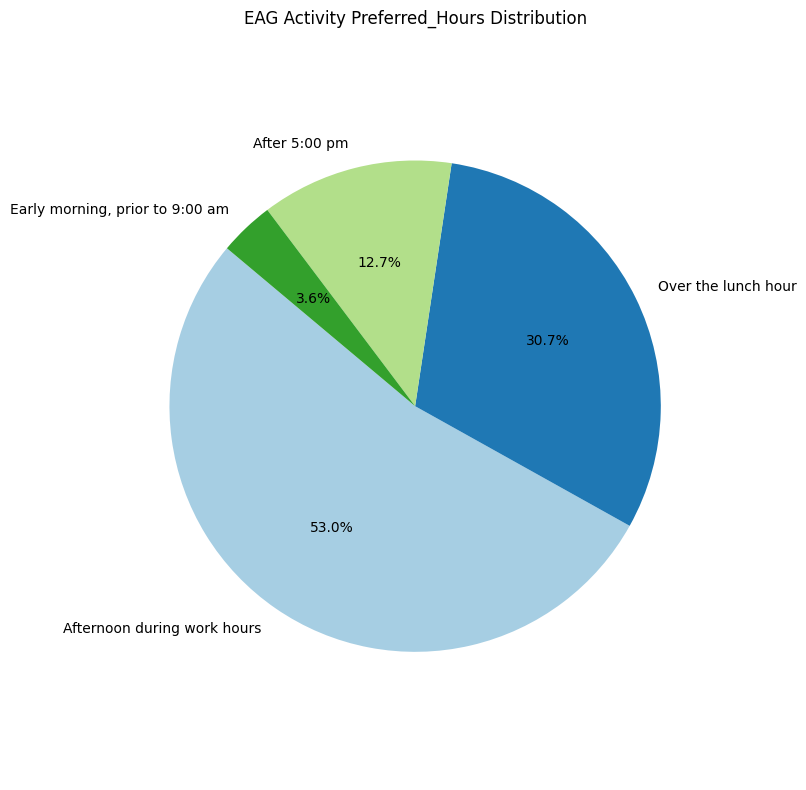

In [20]:
plot_pie_chart(df,'Preferred_Hours')

In [28]:
def plot_bar_chart(dataframe, column_name):
    """
    Plots a bar chart for the specified column in the given DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    # Count the occurrences of each unique value in the specified column
    value_counts = dataframe[column_name].value_counts()

    # Convert to DataFrame and reset the index
    value_counts_df = pd.DataFrame(value_counts).reset_index()
    value_counts_df.columns = [column_name, 'Count']

    # Sort the DataFrame by the column
    value_counts_df_sorted = value_counts_df.sort_values(by='Count', ascending= False)

    # Plot the bar chart
    bars = value_counts_df_sorted.plot(kind='bar', x=column_name, y='Count', legend=False, color='skyblue')
    # plt.title(f'{column_name} Distribution')
    plt.title(f'Preference for {column_name.replace("_", " ").title()}')
    plt.xlabel(column_name.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add labels to each bar
    for bar in bars.patches:
        height = bar.get_height()
        bars.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height / 2), 
                      ha='center', va='center', fontsize=10, color='black')

    # Display the plot
    plt.show()

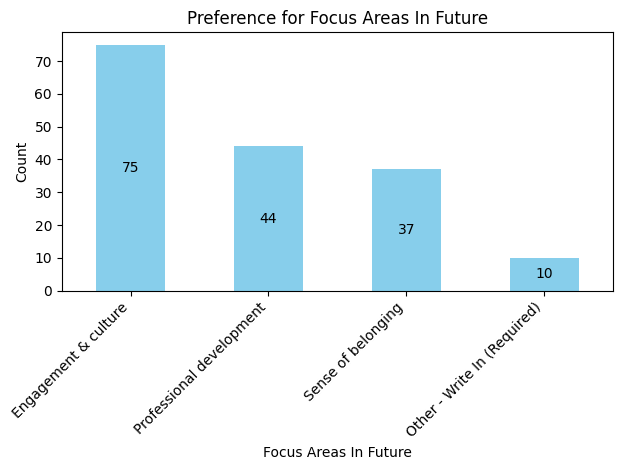

In [29]:
plot_bar_chart(df,'Focus_Areas_in_Future')

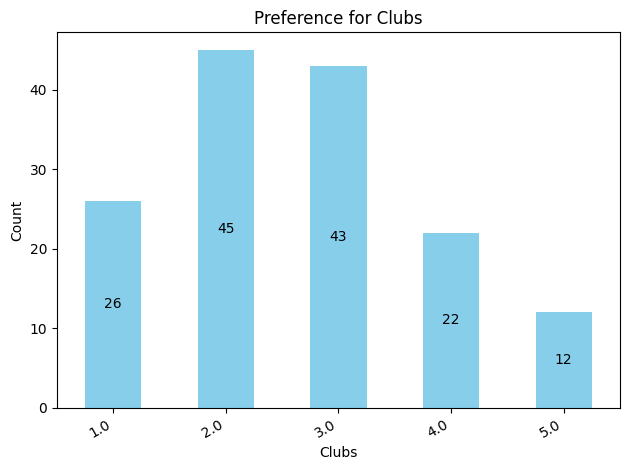

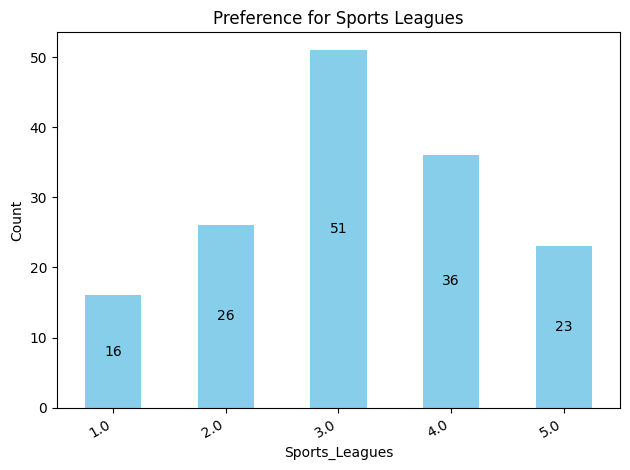

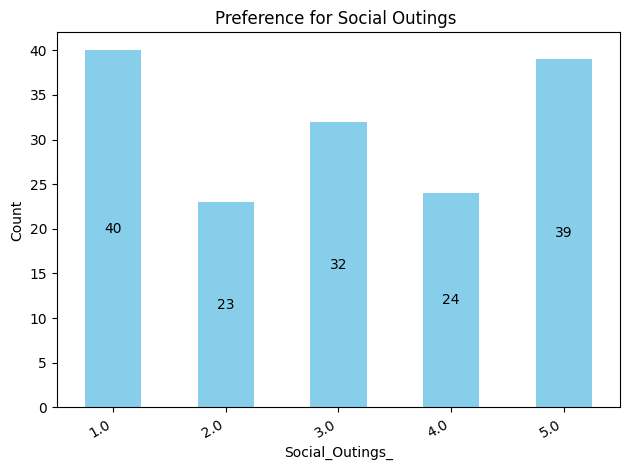

In [10]:

# List of columns to plot
columns_to_plot = ['Clubs', 'Sports_Leagues', 'Social_Outings_']

for column in columns_to_plot:
    # Ensure the column is of type float
    df[column] = df[column].astype(float)

    # Count the occurrences of each unique value
    count = df[column].value_counts()

    # Convert to DataFrame and reset the index
    count_df = pd.DataFrame(count).reset_index()
    
    # Rename the columns for clarity
    count_df.columns = [column, 'Count']

    # Sort the DataFrame by the column
    count_df_sorted = count_df.sort_values(by=column)
    
    # Plot the bar chart
    bars = count_df_sorted.plot(kind='bar', x=column, y='Count', legend=False, color='skyblue')
    plt.ylabel('Count')
    plt.title(f'Preference for {column.replace("_", " ").title()}')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()

    # Add labels to each bar
    for bar in bars.patches:
        height = bar.get_height()
        bars.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height / 2), 
                      ha='center', va='center', fontsize=10, color='black')

    # Display the plot
    plt.show()

In [11]:
rating = df[['Clubs', 'Sports_Leagues', 'Social_Outings_']]
rating_drop_nan = rating.dropna()
rating_drop_nan.describe()

,Clubs,Sports_Leagues,Social_Outings_
count,146.000000,146.000000,146.000000
mean,2.657534,3.136986,2.958904
std,1.177012,1.172267,1.521690
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


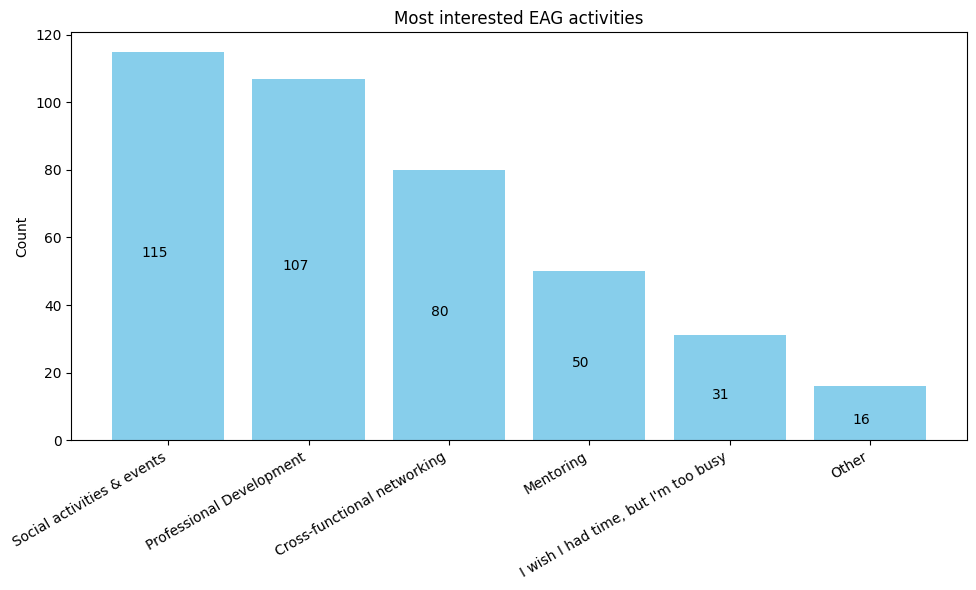

In [12]:

# Data from the image
data = {
    "Category": ["Professional Development", "Mentoring", "Cross-functional networking", "Social activities & events", "I wish I had time, but I'm too busy", "Other"],
    "Count": [107, 50, 80, 115, 31, 16]
}

# Create a DataFrame
df_1 = pd.DataFrame(data)
df_sorted = df_1.sort_values(by="Count", ascending=False)

# Create a bar plot with labels on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted["Category"], df_sorted["Count"], color='skyblue')

plt.ylabel('Count')
plt.title('Most interested EAG activities')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height)}', ha='right', va='top')

plt.show()



In [14]:
df.columns

Index(['Response_ID', 'Column1', 'Status', 'City', 'State/Region', 'P1', 'P2',
       'P3', 'P4', 'P5', 'Clubs', 'Sports_Leagues', 'Social_Outings_',
       'Other_interested_Activities', 'area_of_focus_in_future', 'frequency',
       'best_hours', 'additional_ideas_or_requests.'],
      dtype='object')

In [13]:
state_count = df['State/Region'].value_counts()

# Convert to DataFrame and reset the index
df_state = pd.DataFrame(state_count).reset_index()
df_state.columns = ['State_Code', 'count']

# Create a choropleth map
fig = px.choropleth(
    df_state,
    locations='State_Code',
    locationmode="USA-states",
    color='count',
    scope="usa",
    color_continuous_scale="reds",
    title="State Counts"
)

# Show the plot
fig.show()
